Esta tarea está dividida en 3 partes: 

1. Uso básico de Julia. Operaciones básicas con escalares, vectores y matrices.
- Gráficas con Plots. 
- Estimaciones de complejidad computacional. 

In [1]:
using Plots

In [2]:
gr()

Plots.GRBackend()

In [3]:
using LinearAlgebra

In [4]:
using LsqFit

In [124]:
using Pkg
Pkg.add("BenchmarkTools")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % [========>                                ]  20.0 %39.8 %>                ]  59.8 %>       ]  80.3 % Resolving package versions...
 Installed BenchmarkTools ─ v0.4.2
 Installed StatsBase ────── v0.28.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [6e4b80f9] + BenchmarkTools v0.4.2
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v0.4.2
  [2913bbd2] ↑ StatsBase v0.27.0 ⇒ v0.28.0


In [125]:
using BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1192


# Uso básico de Julia

## Funciones

[1] Usando la ley de radiación del cuerpo negro y datos experimentales, se llega a que para una temperatura dada, el espectro de energía como función de la frecuencia de luz radiada sigue la siguiente ecuación.

$$ \frac{\nu^3}{e^{\nu/3} - 1} = U(\nu) $$

 Se mide una energía $U(\nu) = 5$, ¿a qué frecuencia corresponde?  
 
Cómo se trata de una ecuación trasendental, es casi siempre necesario utilizar métodos numéricos. Si conoces el método de Newton Raphson, aplícalo, si no lo conoces, sigue los siguientes pasos: 

i) Haz una función en JULIA para calcular $U(\nu)-5$.

ii) Calcula la derivada (de forma analítica) de la función y haz una función en JULIA que calcule $\frac{d U}{d\nu}(\nu)$. (Puedes usar wolfram alpha)

iii) Haz una función ($f(m, x_0, y_0)$) que calcule la intersección de una recta ($y(x) = m(x-x_0)+y_0$), y el eje $x$. 

iv) Haz una adivinanza inicia de qué valor debe de tener $\nu$. Tu adivinanza ($\nu_0$) y $U(\nu_0)-5$ serán $x_0$ y $y_0$. La pendiente será $m= \frac{d U}{d\nu}(\nu_0)$. Una segunda buena adivinanza sería $\nu_1 = f(m, \nu_0, U(\nu_0))$. 

v) Haz una función que calcule de forma recursiva (utilizando el ciclo while) el valor de $\nu_i$ utilizando la idea del inciso anterior. Para hacer el ciclo, mide qué tan lejano de $U(\nu) = 0$ está tu valor de $\nu_i$ en cada paso. Si la distancia es menor que una cierta tolerancia (por ejemplo $\Delta = 0.00001$), el ciclo se detiene. No olvides poner un contador al hacer pruebas. Finalmente, obten el valor de $\nu$.

Acabas de utilizar el método de Newton Rapshon para calcular el valor de $\nu$!


Las raices del polinomio son[1.46601, -1.17438, 23.6388, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]

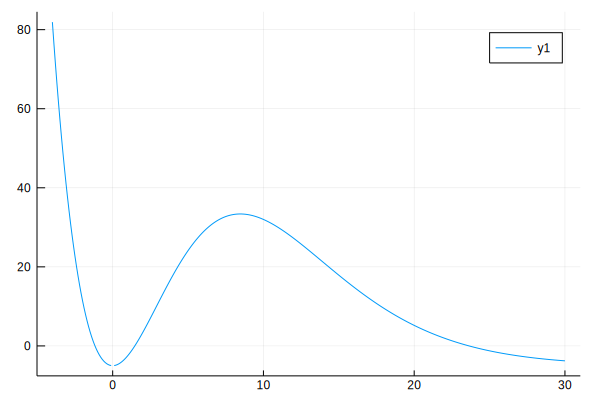

In [5]:
function NR(f,f′)
    num_rand = 1000
    A = rand(-20.0:20.0, num_rand, 1)
    
    C = [0.0]
    interval = 1:num_rand
    for i in interval
        for j in 1:100
            A[i] = A[i] - f(A[i])/f′(A[i])
        end
        contador = 0
        for k in 1:length(C)
            if round(A[i]) == round(C[k])  
            contador += 1  
            end
           # @show A, A[i], C[k],C
        end
        if (contador < 1) && (A[i] != NaN)
            push!(C,A[i])
        end  
    end
    deleteat!(C,1)
    print("Las raices del polinomio son", C)
end
f(x) = (x^3)/(exp(x/3) - 1) - 5
f′(x) = -((9 + exp(x/3)*(-9 + x))*x^2)/(3*(-1 + exp(x/3))^2)
NR(f, f′)

intervalo = -4:0.1:30
plot(intervalo, f.(intervalo))


[2] Usa BigFloat para resolver la misma ecuación que la anterior, compara el resultado y el tiempo de cómputo (recomendamos usar BenchmarkTools con @btime).

## Recordatorio de álgebra (geometría) vectorial

[3]  En el curso, el uso de vectores será más que común. Por eso necesitas tener algo de práctica con ellos y debes saber calcular las cantidades básicas. 

    i) Calcula la distancia entre 2 vectores dados en 2D. 
    
    ii) Calcula la proyección de un vector sobre el otro. 
    
    iii) Calcula el área que forma el rombo producido por ambos vectores.
    
    iv) Calcula el vector ortonormal a ambos vectores (si lo hiciste bien, debes obtener (0,0,1) o bien (0,0,-1)).

- i) Calcula la distancia entre 2 vectores dados en 2D.

In [6]:
u = rand(2)
v = rand(2)
w = u .- v
distancia = norm(w)

0.7542776197715235

- ii) Calcula la proyección de un vector sobre el otro.

In [7]:
v = [6,0]
u = [3,0]
proyeccion = (dot(u,v)/dot(v,v))*v


2-element Array{Float64,1}:
 3.0
 0.0

- iii) Calcula el área que forma el rombo producido por ambos vectores.

In [8]:
u_3d = rand(3)
v_3d = rand(3)
area = norm(u_3d × v_3d)

0.1640732042078215

- iv) Calcula el vector ortonormal a ambos vectores (si lo hiciste bien, debes obtener (0,0,1) o bien (0,0,-1)).

In [9]:
u = [rand(2);[0.0]]
v = [rand(2);[0.0]]
vector = u × v
vector_ortonormal = vector/ norm(vector)

3-element Array{Float64,1}:
  0.0
  0.0
 -1.0

[4] Calcula la distancia entre un punto en el espacio y una recta. Para esto haz una función que tome como variables el vector $x_0$, el vector $x_1$ y el vector $v_1$. Estos valores representan el punto en el espacio, un punto por el que pasa la recta y el vector dirección de la recta. 

In [10]:
function Punto_recta(x_0, x_1, v_1)    
    distancia = norm((x_0 - x_1)×v_1)/norm(v_1)
    return distancia
end

x_0 = [2,0,0]
x_1 = [0,0,0]
v_1 = [1,0,1]

Punto_recta(x_0, x_1, v_1)

1.414213562373095

[5] Calcula la distancia entre dos rectas oblicuas, es decir, dos rectas en 3D, que no son paralelas, pero no se tocan en ningún momento. Haz para esto una función que tome como entradas uno de los puntos por los que pasa cada una de las rectas y sus vectores direccionales, y que regrese la distancia entre ambas rectas (la distancia se mide entre los puntos más cercanos entre ambas rectas). 

In [11]:
function Recta_recta(x_1, x_2, v_1, v_2)   
    A = x_2-x_1
    B = v_1
    C = v_2
    doble_vect = det([transpose(A); transpose(B); transpose(C)])
    distancia = norm(doble_vect)/(norm(v_1 × v_2))
    return distancia
end

x_1 = [0,0,0]
x_2 = [0,0,1]
v_1 = [1,1,0]
v_2 = [-1,1,0]

Recta_recta(x_1, x_2, v_1, v_2)

1.0

## Matrices

Lo más básico es saber resolver sistemas de ecuaciones. 

[6] Resuelve el siguiente sistema de ecuaciones lineales numéricamente. 

$$ 
\begin{array}{rcl} 3.5x_1-3x_2+5.2x_3-4.1x_4-3.6x_5 = \sqrt{2} \\ \sqrt{2}x_1+4x_2-x_3+4.4x_4-2.8x_5 = \pi \\ x_1+2x_2+3x_3+4x_4+5x_5 = -1  \\ -3.3x_1-2.8x_2+x_3-1.9x_4+x_5 = 10.3  \\ 1.3x_1-1.3x_2+2.2x_3+4.4x_4+5.5x_5 = 7.9  \end{array}
$$

In [12]:
A = [[3.5 -3.0 5.2 -4.1 -3.6]; 
    [√2.0 4.0 -1.0 4.4 -2.8]; 
    [1.0 2.0 3.0 4.0 5.0]; 
    [-3.3 -2.8 1.0 -1.9 1.0]; 
    [1.3 -1.3 2.2 4.4 5.5]]
b = [√2, π, -1.0, 10.3, 7.9]

x = A \ b

5-element Array{Float64,1}:
 -2.5911014102256047
 -3.18434722490367  
  1.47908636828884  
  3.463111334369218 
 -2.06598171646209  

[7] El siguiente paso es entender qué significa un producto matricial geométricamente. Esto puede ser una rotación, una reflexión o un estiramiento. 

   i) Haz una función que genere una matriz de rotación para el caso 2D y el caso 3D (en este último caso necesitarás dar como argumentos 3 ángulos). 
   
   ii) También haz una matriz que estire objetos una cantidad dada y en una dirección a legirse entre los N ejes posibles. 

- I)1.-

In [13]:
function rotar_2D(θ, M)
    R = [cos(θ) -sin(θ);
        sin(θ) cos(θ)]
    M′ = R * M
    
    return M′
end
M = [0,1]
rotar_2D(π,M)

2-element Array{Float64,1}:
 -1.2246467991473532e-16
 -1.0                   

- I)2.-

In [14]:
function rotar_3D(α, β, γ, M)
    R_x = [1 0 0;
        0 cos(α) -sin(α);
        0 sin(α) cos(α)]
    R_y = [cos(β) 0 sin(β);
        0 1 0;
        -sin(β) 0 cos(β)]
    R_z = [cos(γ) -sin(γ) 0;
        sin(γ) cos(γ) 0;
        0 0 1]
    M′ = (R_z*R_y*R_x) * M
    
    return M′
end
M = [0,0,1]
rotar_3D(π, π/2, π, M)

3-element Array{Float64,1}:
  1.0                  
  0.0                  
 -6.123233995736766e-17

- II)

In [15]:
function estirar_3D(x,y,z,M)
    E_x = [x 0 0;
            0 1 0;
            0 0 1]
    E_y = [1 0 0;
            0 y 0;
            0 0 1]
    E_z = [1 0 0;
            0 1 0;
            0 0 z]
    
    M′ = (E_z*E_y*E_x)*M
end
M = [1,1,3]
estirar_3D(1,3,2,M)

3-element Array{Int64,1}:
 1
 3
 6

Otra posibilidad es que conozcas la matriz, que hace al mismo tiempo rotaciones y estiramientos, deformando un objeto dado y lo que quieras, es descomponer esta transformación en una rotación o reflexión (una transformación unitaria), luego un estiramiento a lo largo de los ejes (una matriz diagonal) y luego otra rotación (otra transformación unitaria). Para eso se usa lo que se conoce como descomposición de valores singulares (SVD). 

Cualquier matriz $M$ puede descomponerse en el producto de tres matrices $U$,$S$ y $V$, de tal forma que $M = USV$, con $U$ y $V$ matrices unitarias y $S$ una matriz rectangular. 

[8] Genera una matriz aleatoria de $100\times100$. Obten su descomposicion en valores singulares: Usa svd, o svdfact

In [16]:
A = rand(100,100)
U_1, S_1, V_1 = svd(A)

SVD{Float64,Float64,Array{Float64,2}}([-0.0979663 0.122238 … -0.0238692 -0.0105914; -0.103394 0.0191784 … -0.0241025 0.0379692; … ; -0.0948977 0.147942 … -0.0026145 -0.0397142; -0.105841 -0.136837 … 0.0111619 -0.0549156], [50.1692, 5.64352, 5.44905, 5.37949, 5.25943, 5.07905, 5.0758, 4.97482, 4.77898, 4.6764  …  0.457074, 0.405121, 0.365687, 0.313705, 0.244837, 0.218859, 0.182538, 0.121301, 0.0713231, 0.00762648], [-0.0836095 -0.0949585 … -0.0936882 -0.0964531; -0.154692 -0.147723 … -0.0995259 -0.111758; … ; -0.130147 -0.119582 … 0.0308212 -0.202542; -0.0791726 0.00295026 … 0.0985861 -0.00372282])

# Gráficas, animaciones y simulaciones en tiempo real: 

[9] Haz una gráfica de un círculo, primero generando los puntos de este y después utilizando plot para graficarlos.

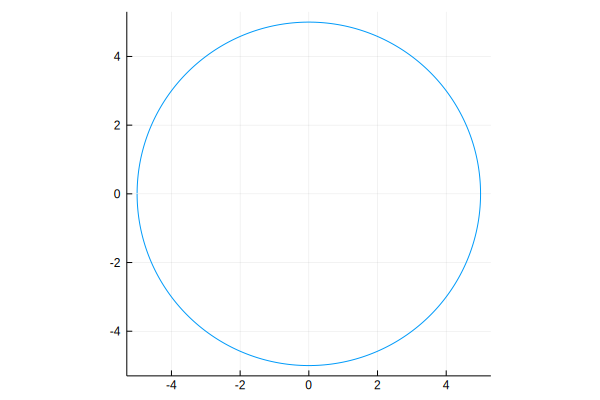

In [17]:
function circulo(r)
    θ = -π:0.01:π
    x = r.*cos.(θ)
    y = r.*sin.(θ)
    plot(x, y,  aspect_ratio = 1, leg = false)
end
circulo(5)

[10] Genera una matriz aleatoria de $2\times 2$, aplícala a los puntos generados en el inciso anterior y grafícalos. Después aplica SVD para obtener las matrices $U$, $S$ y $V$. Grafica como se ven los puntos si sólo aplicas la matriz $S$ y después prueba aplicar la matriz $S$ y alguna de las otras. 

- 1.-

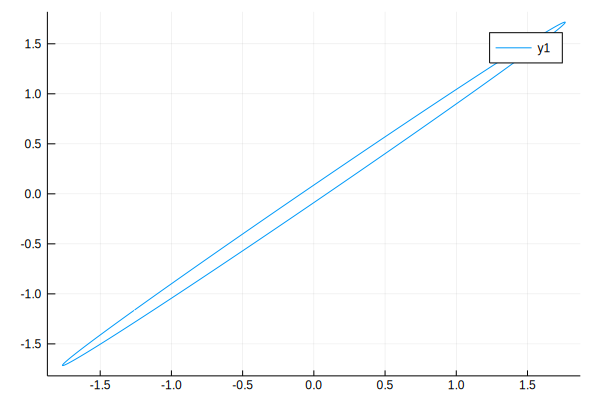

In [18]:
θ = -π:0.01:π
r = 2
x = r.*cos.(θ)
y = r.*sin.(θ)
L = [x y]
M = transpose(L)

C = rand(2,2)

M′ = C*M

x′ = M′[1,:]
y′ = M′[2,:]

plot(x′, y′)

- 2.-

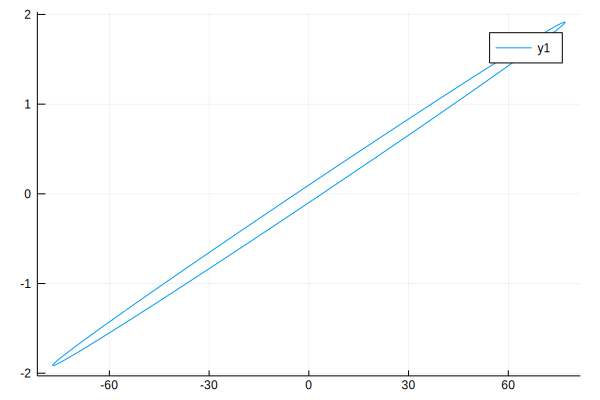

In [19]:
U, S, V = svd(M′)

#SU = s.*M′ CREO que esto es lo mismo que lo que se está haciendo aquí abajo
SA = diagm(0 => S)*M′
#M′ = U*diagm(0 => S)*V' #Así es como se descompone la matriz M′ son svd
plot(SA[1,:], SA[2,:])


- 3.-

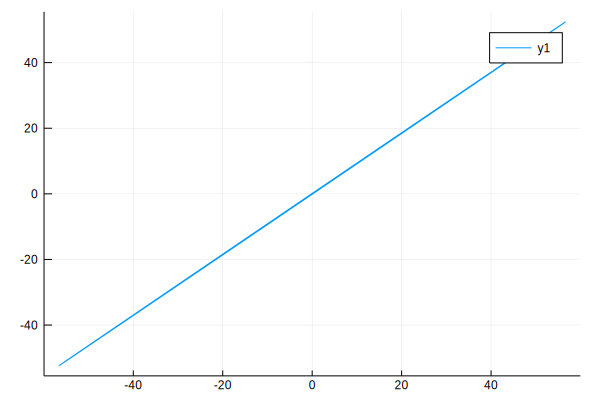

In [20]:
USA = U*SA

plot(USA[1,:], USA[2,:])

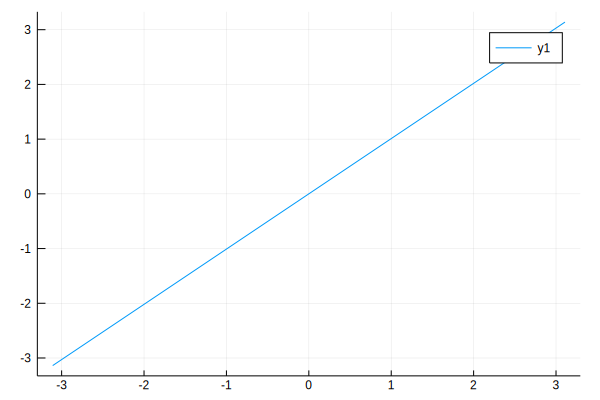

In [21]:
VSA = V*SA

plot(VSA[1,:], VSA[2,:])

[12] Ahora haz algun dibujo interesante (una carita, un animal, lo que sea) construyendo un arreglo (o varios) de puntos. Después aplica a tu(s) arreglo(s) la matriz aleatoria del inciso anterior y también las matrices $U$, $S$ y $V$. Juega un poco con esto. 

- 1.- Haz algun dibujo interesante (una carita, un animal, lo que sea) construyendo un arreglo (o varios) de puntos

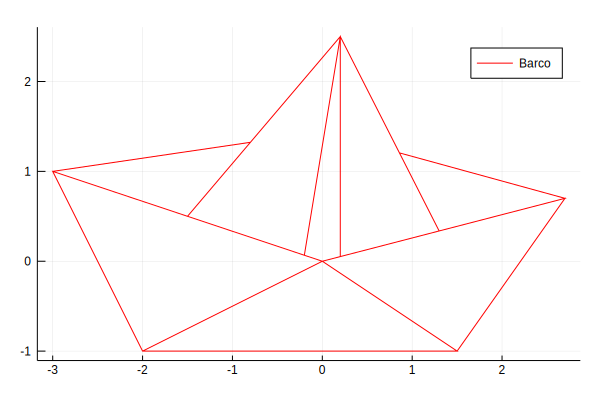

In [22]:
#vertices_barco = [(-3.0,1.0), (0.0,0.0), (2.7,0.7), (1.5,-1.0), (-2,-1.0), (-3.0,1.0), (0.0,0.0), (2.7,0.7), (0.0,0.0,), (-2.0,-1.0), (1.5,-1.0), (0.0,0.0), (0.2,0.2*0.7/2.7), (0.2,2.5), (1.3,1.3*0.7/2.7), (0.0,0.0), (-1.5,1.5/3.0), (0.2,2.5), (-0.2,0.2/3.0), (-3.0,1.0), (-0.8,(2.5-1.5/3.0)/(0.2+1.5)*(-0.8) + ((1.5/3.0)-(2.5-1.5/3.0)/(0.2+1.5)*(-1.5))), (-1.5,1.5/3.0), (0.0,0.0),(2.7,0.7), (0.8583001638960435,1.2055646608912816)]
#plot(vertices_barco, aspect_ratio = 1, lc = :red)

vertices_barco_x_y = [-3.0 0.0 2.7 1.5 -2 -3.0 0.0 2.7 0.0 -2.0 1.5 0.0 0.2 0.2 1.3 0.0 -1.5 0.2 -0.2 -3.0 -0.8 -1.5 0.0 2.7 0.8583001638960435;
                    1.0 0.0 0.7 -1.0 -1.0 1.0 0.0 0.7 0.0 -1.0 -1.0 0.0 0.2*0.7/2.7 2.5 1.3*0.7/2.7 0.0 1.5/3.0 2.5 0.2/3.0 1.0 (2.5-1.5/3.0)/(0.2+1.5)*(-0.8) + ((1.5/3.0)-(2.5-1.5/3.0)/(0.2+1.5)*(-1.5)) 1.5/3.0 0.0 0.7 1.2055646608912816]
barco = plot(vertices_barco_x_y[1,:], vertices_barco_x_y[2,:], aspect_ratio = 1, lc = :red, lab = "Barco")

- 2.- Después aplica a tu(s) arreglo(s) la matriz aleatoria del inciso anterior y también las matrices $U$, $S$ y $V$. Juega un poco con esto.

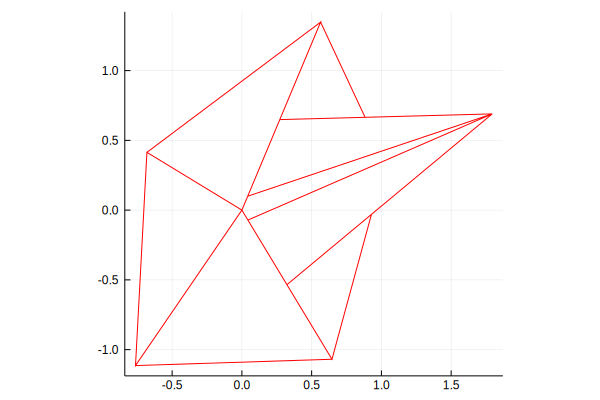

In [23]:
C = rand(2,2)
Barco_alterado = C*vertices_barco_x_y

plot(Barco_alterado[1,:], Barco_alterado[2,:], aspect_ratio = 1, lc = :red, leg = false)

- 3.-

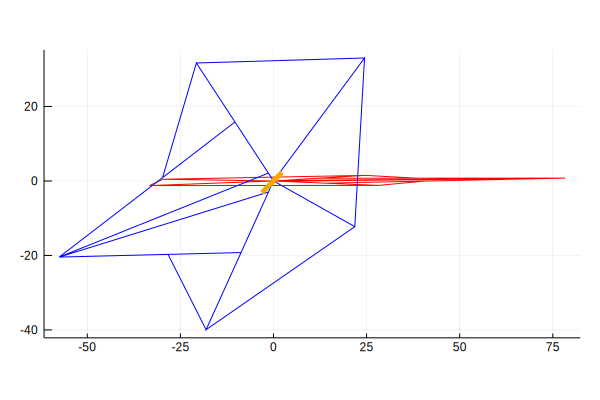

In [24]:
Barco_alterado_1 = S.*Barco_alterado
Barco_alterado_2 = U*S.*Barco_alterado
Barco_alterado_3 = V*(U*S.*Barco_alterado)

plot(Barco_alterado_1[1,:], Barco_alterado_1[2,:], aspect_ratio = 1, lc = :red, leg = false)
plot!(Barco_alterado_2[1,:], Barco_alterado_2[2,:], aspect_ratio = 1, lc = :blue, leg = false)
plot!(Barco_alterado_3[1,:], Barco_alterado_3[2,:], aspect_ratio = 1, lc = :orange, leg = false, lw = 5)

[12] Haz una animación de deformaciones a tu arreglo de puntos del inciso anterior. Rotalo, estiralo, reflejalo, variando los ángulos de rotación, los estiramientos en cada eje, etc... 

In [25]:
Barco = @animate for θ in 0:0.1:2π
    vertices_barco_x_y = [-3.0 0.0 2.7 1.5 -2 -3.0 0.0 2.7 0.0 -2.0 1.5 0.0 0.2 0.2 1.3 0.0 -1.5 0.2 -0.2 -3.0 -0.8 -1.5 0.0 2.7 0.8583001638960435;
                    1.0 0.0 0.7 -1.0 -1.0 1.0 0.0 0.7 0.0 -1.0 -1.0 0.0 0.2*0.7/2.7 2.5 1.3*0.7/2.7 0.0 1.5/3.0 2.5 0.2/3.0 1.0 (2.5-1.5/3.0)/(0.2+1.5)*(-0.8) + ((1.5/3.0)-(2.5-1.5/3.0)/(0.2+1.5)*(-1.5)) 1.5/3.0 0.0 0.7 1.2055646608912816]
    Barco_anim = rotar_2D(θ, vertices_barco_x_y)
    
    plot(Barco_anim[1,:], Barco_anim[2,:], key = false, show = false, xlim = [-3,3], ylims = [-3,3])
    end

gif(Barco,"Barco2.gif")

┌ Info: Saved animation to 
│   fn = /home/oscar/Escritorio/Semestre9/Temas_Selectos_de_Fisica_Computacional/Julia_TSFCI_GitHub/Barco2.gif
└ @ Plots /home/oscar/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/home/oscar/Escritorio/Semestre9/Temas_Selectos_de_Fisica_Computacional/Julia_TSFCI_GitHub/Barco2.gif")

In [26]:
vertices_cubo = [1 -1 -1 1 1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 1 1;
                -1 -1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1 1 1 1 1 -1;
                1 1 1 1 1 -1 -1 -1 -1 -1 -1 1 1 1 -1 -1 1 -1]

3×18 Array{Int64,2}:
  1  -1  -1  1   1   1   1  -1  -1   1  -1  -1  -1  -1  -1   1  1   1
 -1  -1   1  1  -1  -1   1   1  -1  -1  -1  -1  -1   1   1   1  1  -1
  1   1   1  1   1  -1  -1  -1  -1  -1  -1   1   1   1  -1  -1  1  -1

In [27]:
lim = 5
Cubo = @animate for θ in -2π:0.1:2π
    Cubo_anim3D = rotar_3D(0, 0, θ,  vertices_cubo)
    Cubo_anim3D_1 = estirar_3D(1, 1, θ, Cubo_anim3D)
    plot(Cubo_anim3D_1[1,:], Cubo_anim3D_1[2,:], Cubo_anim3D_1[3,:], key = false, show = false, xlim = [-1.5,1.5], ylim = [-1.5,1.5], zlim = [-lim,lim])
end

gif(Cubo,"Cubo.gif")

┌ Info: Saved animation to 
│   fn = /home/oscar/Escritorio/Semestre9/Temas_Selectos_de_Fisica_Computacional/Julia_TSFCI_GitHub/Cubo.gif
└ @ Plots /home/oscar/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/home/oscar/Escritorio/Semestre9/Temas_Selectos_de_Fisica_Computacional/Julia_TSFCI_GitHub/Cubo.gif")

[13] Haz una gráfica de cualquier curva que quieras (sin, cos, exp, etc...) que tenga una parte positiva y otra negativa. Rellena con un color la parte positiva y con otro la parte negativa. 

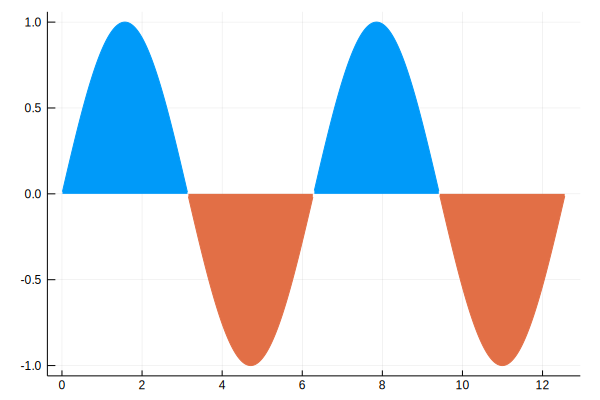

In [28]:
function Rellenar(f)
    intervalo = range(0,length=1000,stop=4π)
    x = collect(Float16, intervalo)
    y = f.(x)
    positivos_x = []
    negativos_x = []
    for i in intervalo
        if f(i) > 0 
            push!(positivos_x, i)
        elseif f(i) < 0
            push!(negativos_x, i)
        else
        end
        #@show positivos_x, positivos_y, negativos_x, negativos_y
    end
    trim(f; val=0.00787) = x -> abs(f(x)) < val ? NaN : f(x) ##Para quitar las discontinuidades cuando se cortan los intervalos
    plot(trim(f),[positivos_x,negativos_x],fill = true, leg = false)
    
end
f(x) = sin(x)
Rellenar(f)

[14] Haz un círculo, un hexágono, un pentágono y alguna otra figura (rara) y rellena su área. 

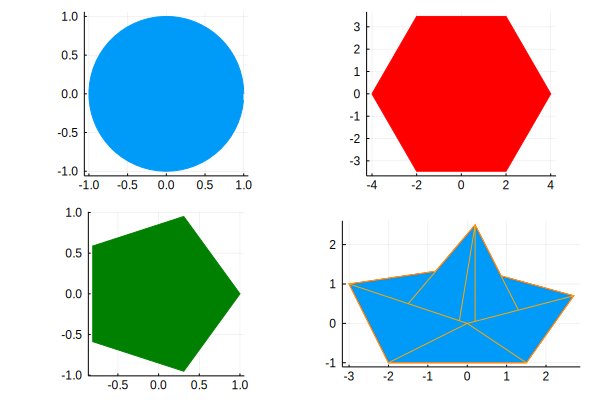

In [29]:
θ = 0:0.1:2π
p1 = plot(1.0*cos.(θ), 1.0*sin.(θ), fill = true, aspect_ratio = 1)

vertices_hexagono = [(-4.0,0.0), (-2.0,2.0*√(3.0)), (2.0,2.0*√(3.0)), (4.0,0.0), (2.0,-2.0*√(3.0)),(-2.0,-2.0*√(3.0)), (-4.0,0.0) ]
p2 = plot(vertices_hexagono, fill = (0,:red), lc = :red, aspect_ratio = 1)

vertices_pentagono =[(cos(2π/5),sin(2π/5)), (cos(4π/5),sin(4π/5)), (cos(6π/5),sin(6π/5)), (cos(8π/5),sin(8π/5)), (cos(2π),sin(2π)), (cos(2π/5),sin(2π/5))]
p3 = plot(vertices_pentagono,lc = :green, fill = (0,:green), aspect_ratio = 1)

vertices_barco =[(-3.0,1.0), (0.0,0.0), (2.7,0.7), (1.5,-1.0), (-2,-1.0), (-3.0,1.0), (0.0,0.0), (2.7,0.7), (0.0,0.0,), (-2.0,-1.0), (1.5,-1.0), (0.0,0.0), (0.2,0.2*0.7/2.7), (0.2,2.5), (1.3,1.3*0.7/2.7), (0.0,0.0), (-1.5,1.5/3.0), (0.2,2.5), (-0.2,0.2/3.0), (-3.0,1.0), (-0.8,(2.5-1.5/3.0)/(0.2+1.5)*(-0.8) + ((1.5/3.0)-(2.5-1.5/3.0)/(0.2+1.5)*(-1.5))), (-1.5,1.5/3.0), (0.0,0.0),(2.7,0.7), (0.8583001638960435,1.2055646608912816)]
contorno_barco =[(2.7,0.7), (1.5,-1.0), (-2,-1.0), (-3.0,1.0), (-0.8,(2.5-1.5/3.0)/(0.2+1.5)*(-0.8) + ((1.5/3.0)-(2.5-1.5/3.0)/(0.2+1.5)*(-1.5))), (0.2,2.5), (0.8583001638960435,1.2055646608912816), (2.7,0.7)]
p4 = plot(contorno_barco, aspect_ratio = 1, fill = true, lc = :red)
plot!(vertices_barco, aspect_ratio = 1, lc = :orange)

plot(p1, p2, p3, p4,leg = false)

[15] Haz una función que dadas dos rectas en el plano (por ejemplo usando como argumentos vectores dirección y un punto por el que pasen) dibuje ambas rectas y el punto donde se intersectan si se intersectan, y un punto medio si son paralelas. 

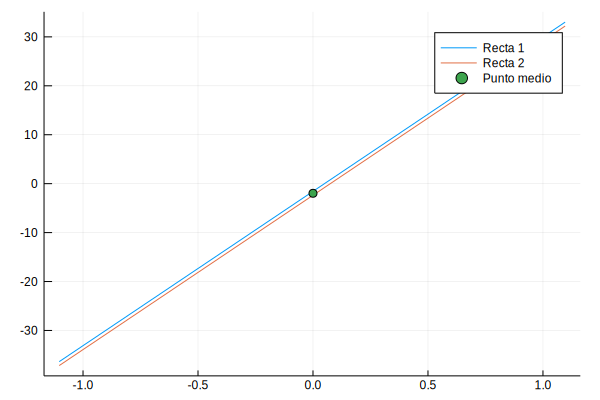

In [30]:
function Rectas_plano(x_1, x_2, v_1, v_2)   
    m_1 = (v_1[2]/v_1[1])
    m_2 = (v_2[2]/v_2[1])
    
    if m_1 == m_2 
        x_3 = 0.5 *(x_2 + x_1)
        punto = (-x_3[1]) .* m_1 + x_3[2]
        a = maximum(abs.([x_1;x_2;v_2;v_1]))
        
        switch = 0
    else 
        equis = (x_2[2] - x_1[2] - x_2[1]*m_2 + x_1[1]*m_1) / (m_1 - m_2)
        a = maximum(abs.([x_1;x_2;v_2;(x_2[2] - x_1[2] - x_2[1]*m_2 + x_1[1]*m_1) / (m_1 - m_2)]))        
        
        switch = 1
    end
    
    intervalo = -2a:0.1:2a
    recta_1(intervalo) = (intervalo .- x_1[1]).*m_1 .+ x_1[2]
    recta_2(intervalo) = (intervalo .- x_2[1]).*m_2 .+ x_2[2]
    plot(intervalo, recta_1.(intervalo), lab = "Recta 1")
    plot!(intervalo, recta_2.(intervalo), lab = "Recta 2")
    
    if switch == 0
        scatter!([0],[punto], lab = "Punto medio")
    else 
        scatter!([equis], [recta_1(equis)], lab = "Intersección")
    end
    
end

x_1 = rand(2)
x_2 = rand(2)

#Para las paralelas
v = rand(2)
v_1 = v
v_2 = v

#Para las intersecciones
#v_1 = rand(2)
#v_2 = rand(2)

Rectas_plano(x_1, x_2, v_1, v_2)

[16] Haz una función que dadas dos rectas en el espacio (como argumentos tome puntos por los que pasan y vectores de dirección, por ejemplo) dibuje ambas rectas en el espacio y el segmento que las une por su distancia (este último dibujado en otro color). 

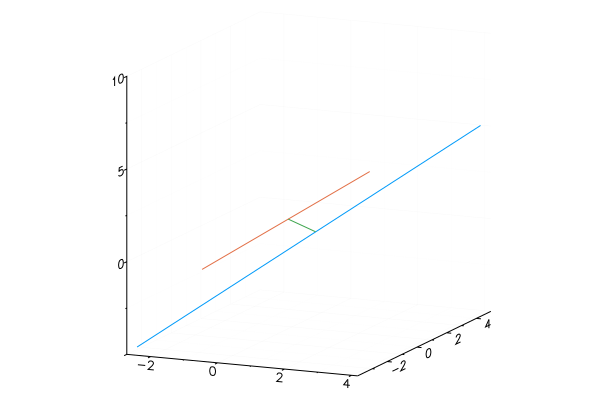

In [31]:
function Rectas_espacio(x_1, x_2, v_1, v_2) 
    A = x_2-x_1
    B = v_1
    C = v_2
    doble_prod_vect = det([transpose(A); transpose(B); transpose(C)])
    
    a = (v_1 × v_2)
    distancia = norm(doble_prod_vect)/(norm(v_1 × v_2))
    n = distancia.*(a/(norm(a)))
    
    #Sistema de ecuaciones para puntos sobre las rectas cuya resta sea paralela al vector director:
    R = [[(n[2]*v_2[3] - n[3]*v_2[2]) (n[3]*v_1[2] - n[2]*v_1[3])];
        [(n[1]*v_2[3] - n[3]*v_2[1]) (n[3]*v_1[1] - n[1]v_1[3])];
        [(n[1]*v_2[2] - n[2]v_2[1]) (n[2]*v_1[1] - n[1]v_1[2])]]
    
    p = [[n[2]*(x_1[3] - x_2[3]) + n[3]*(x_2[2] - x_1[2])];
        [n[1]*(x_1[3] - x_2[3]) + n[3]*(x_2[1] - x_1[1])];
        [n[1]*(x_1[2] - x_2[2]) + n[2]*(x_2[1] - x_1[1])]]
    
    x = R \ p
    
    #b = maximum(abs.([x_1;x_2;v_2;v_1]))
    b = 5
    t = -b:0.1:b
    
    r_1x(t) = x_1[1] .+ t*v_1[1]
    r_1y(t) = x_1[2] .+ t*v_1[2]
    r_1z(t) = x_1[3] .+ t*v_1[3]
    
    r_2x(t) = x_2[1] .+ t*v_2[1]
    r_2y(t) = x_2[2] .+ t*v_2[2]
    r_2z(t) = x_2[3] .+ t*v_2[3]
    
    punto_en_r_2 = [r_2x(x[1]),r_2y(x[1]),r_2z(x[1])]
    punto_en_r_1 = [r_1x(x[2]),r_1y(x[2]),r_1z(x[2])]
    
    l = 0:0.01:distancia
    n = n/norm(n)
    r_3x(l) = punto_en_r_2[1] .+ l*((punto_en_r_1[1] - punto_en_r_2[1])/distancia)
    r_3y(l) = punto_en_r_2[2] .+ l*((punto_en_r_1[2] - punto_en_r_2[2])/distancia)
    r_3z(l) = punto_en_r_2[3] .+ l*((punto_en_r_1[3] - punto_en_r_2[3])/distancia)
    
    plot(r_1x.(t), r_1y.(t), r_1z.(t), leg = false)
    plot!(r_2x.(t), r_2y.(t), r_2z.(t), leg = false)
    plot!(r_3x.(l), r_3y.(l), r_3z.(l), leg = false)
end

x_1 = rand(3)
x_2 = rand(3)
v_1 = rand(3)
v_2 = rand(3)

Rectas_espacio(x_1, x_2, v_1, v_2)

# Estructuras de datos: 

Las estructuras de datos son las formas en las que se acomodan series de datos (nombres, años, colores, etc...). La forma más fácil de acomodar datos es mediante listas. Por ejemplo: [1,4,7,4,5,9,3,8] las edades de un grupo de animales. Esta estructura de datos es la más sencilla, pero no la mejor siempre. Más adelante veremos algunos casos donde las listas no son la mejor opción. 

[17] En este ejercicio harás algunas de las operaciones básicas sobre estructuras de datos usando una estructura de lista: 

i) Haz un arreglo vacío. A este arreglo agrégale 1000 números aleatorios entre 0 y 100. Con esto tienes tu primera estructura de datos. 

ii) Obtén el mínimo y el máximo de tu arreglo. 

iii) Ordena los números en orden creciente y en orden decreciente. 

iv) Busca dentro de esos números si hay uno que sea 4.23331

- I) Haz un arreglo vacío. A este arreglo agrégale 1000 números aleatorios entre 0 y 100. Con esto tienes tu primera estructura de datos.

In [32]:
A = []
for i in 1:1000
    push!(A, 100*rand(1)[1])
end
A

1000-element Array{Any,1}:
 78.79498356727296 
 84.7276279134742  
 34.449225238578876
 71.09884438753302 
 51.34308309113471 
 33.917781806282   
 73.31839624259662 
  8.048882720851802
 61.54328152071857 
 10.637925294874329
 53.04418401517941 
 60.89932494711561 
 97.76331365421744 
  ⋮                
 11.15936049840478 
 38.76608259244847 
 55.05527723270416 
 85.25431282943342 
 30.571323750669777
 44.00136579094218 
 23.975158210286196
 83.69865074580245 
 38.62580873704133 
 29.05772211735982 
 47.61817820753358 
 63.548829948080446

- II) Obtén el mínimo y el máximo de tu arreglo.


In [33]:
minimo = minimum(A)

0.049027148206515214

In [34]:
maximo = maximum(A)

99.9598894224222

- III) Ordena los números en orden creciente y en orden decreciente.

- Creciente

In [35]:
B = sort(A)

1000-element Array{Any,1}:
  0.049027148206515214
  0.2564992363696561  
  0.6234179556381392  
  0.8261980812695802  
  1.058222943173548   
  1.3082659841876287  
  1.9602438784925624  
  1.96353696349012    
  2.164279820353676   
  2.2149244613283603  
  2.3713509481319894  
  2.4024161077464523  
  2.503197345733499   
  ⋮                   
 99.18064805954671    
 99.23753615533406    
 99.34567868399537    
 99.4554203134324     
 99.58168047680358    
 99.64433077747475    
 99.69606808195617    
 99.70222722711912    
 99.75027888104702    
 99.89851212028633    
 99.95312442322214    
 99.9598894224222     

- Decreciente

In [36]:
C = sort(A, rev = true)

1000-element Array{Any,1}:
 99.9598894224222     
 99.95312442322214    
 99.89851212028633    
 99.75027888104702    
 99.70222722711912    
 99.69606808195617    
 99.64433077747475    
 99.58168047680358    
 99.4554203134324     
 99.34567868399537    
 99.23753615533406    
 99.18064805954671    
 99.0825801769264     
  ⋮                   
  2.4024161077464523  
  2.3713509481319894  
  2.2149244613283603  
  2.164279820353676   
  1.96353696349012    
  1.9602438784925624  
  1.3082659841876287  
  1.058222943173548   
  0.8261980812695802  
  0.6234179556381392  
  0.2564992363696561  
  0.049027148206515214

- IV) Busca dentro de esos números si hay uno que sea 4.23331

In [37]:
findall(in(4.23331), A)
# 4.23331 in A

0-element Array{Int64,1}

[18] Ahora trabajaremos con pares ordenados. Digamos por ejemplo que tienes puntos en el plano. Una forma de estructurar estos datos es en listas de pares. 

i) Haz un arreglo vacío de puntos y agrega 1000 puntos aleatorios con coordenadas enteras que se encuentren dentro de un círculo de radio 50 y centrado en el origen. 

ii) Encuentra el punto que se encuentre más arriba. Si hay 2 que se encuentren a la misma altura (la máxima), selecciona el que se encuentre hasta la izquierda. También encuentra el punto de altura mínima y más a la derecha. 

iii) Ordena tu lista de puntos de forma acendente y decendente del más "arriba" (máximo) al más "abajo" (mínimo). 

iv) Busca si existe el par [12.4441,-3.1145679]

- I) Haz un arreglo vacío de puntos y agrega 1000 puntos aleatorios con coordenadas enteras que se encuentren dentro de un círculo de radio 50 y centrado en el origen. 

In [108]:
A1 = []

while length(A1) < 1000
    B1 = rand(-50:50,2)
    if B1[1]^2 + B1[2]^2 <= 50^2
        push!(A1, B1)
    end
end
A1

1000-element Array{Any,1}:
 [12, -15] 
 [-42, -17]
 [-2, 39]  
 [-3, 3]   
 [11, 4]   
 [42, -8]  
 [4, 22]   
 [1, 35]   
 [2, -46]  
 [-19, -13]
 [35, 3]   
 [12, 27]  
 [-28, 23] 
 ⋮         
 [6, 3]    
 [23, 41]  
 [-37, -29]
 [-3, -4]  
 [-10, 22] 
 [-25, 12] 
 [-32, 32] 
 [-30, -2] 
 [-15, 6]  
 [10, 42]  
 [28, 1]   
 [-10, 1]  

In [109]:
B1 = sort(A1, by = x -> (-x[2],x[1]))
println("Altura máxima izquierda", B1[1])
print("Altura mínima derecha", B1[end])

Altura máxima izquierda[0, 50]
Altura mínima derecha[8, -49]

- III) Ordena tu lista de puntos de forma acendente y decendente del más "arriba" (máximo) al más "abajo" (mínimo).

- Ascendente (desde el más abajo a la derecha hasta el más arriba a la izquierda)

In [110]:
sort(A1, by = x -> (x[2],-x[1]))

1000-element Array{Any,1}:
 [8, -49] 
 [4, -49] 
 [2, -49] 
 [-7, -49]
 [9, -48] 
 [-1, -48]
 [-7, -48]
 [12, -47]
 [11, -47]
 [-4, -47]
 [11, -46]
 [7, -46] 
 [2, -46] 
 ⋮        
 [1, 47]  
 [-5, 47] 
 [13, 48] 
 [13, 48] 
 [4, 48]  
 [-3, 48] 
 [-4, 48] 
 [-9, 48] 
 [-8, 49] 
 [-8, 49] 
 [-9, 49] 
 [0, 50]  

   - Descendente (desde más arriba a la izquierda hasta más abajo a la derecha)

In [111]:
sort(A1, by = x -> (-x[2],x[1]))

1000-element Array{Any,1}:
 [0, 50]  
 [-9, 49] 
 [-8, 49] 
 [-8, 49] 
 [-9, 48] 
 [-4, 48] 
 [-3, 48] 
 [4, 48]  
 [13, 48] 
 [13, 48] 
 [-5, 47] 
 [1, 47]  
 [-11, 46]
 ⋮        
 [7, -46] 
 [11, -46]
 [-4, -47]
 [11, -47]
 [12, -47]
 [-7, -48]
 [-1, -48]
 [9, -48] 
 [-7, -49]
 [2, -49] 
 [4, -49] 
 [8, -49] 

- IV) Busca si existe el par [12.4441,-3.1145679]

In [112]:
[12.4441,-3.1145679] in A1

false

##### Arboles binarios: 
Además de las listas, otra estructura de datos muy común es el de árbol. Un árbol consiste de nodos e hijos (a veces llamados hojas). Se comienza con el nodo raiz, que es el equivalente al primer elemento de una lista. Cada nodo tiene un cierto número de hijos, en el caso de los árboles binarios ese número puede ser sólo 0, 1 o 2.  Los hijos puden ser de izquierda o de derecha. Para determinar si un hijo va a la izquierda o a la derecha se usa una regla previamente determinada. Por ejemplo a la izquierda van los números mayores, a la derecha los menores al nodo. 

[19] En este ejercicio obtendremos un árbol binario (no balanceado, quizá en el futuro veamos como balancear un árbol binario). Para esto usaremos listas de listas. Cada uno de los nodos estará compuesto por 3 elementos: el número (u objeto) y dos listas que contienen nodos izquierdos o derechos. 

i) Genera un número aleatorio entre 0 y 1000 y colócalo como nodo raiz, es decir, el número y dos listas vacías. 

ii) Haz una función para agregar nuevos nodos al árbol. Si el número que se quiere agregar es mayor que el nodo, se recorre el árbol hacia la izquierda, si es menor, a la derecha. Se coloca el nuevo nodo en el primer caso donde el hijo sea un conjunto vacío. Agrega 1000 valores aleatorios a tu árbol usando esta función. Asegúrate de que lo hace correctamente. 

iii) Haz una función que localice el máximo y otra que localice el mínimo. Aplícala a tu árbol. 

iv) Haz una función que genere una lista ordenada de los valores de tu árbol. 

v) Haz una función que busque elementos dentro de tu árbol y regrese una serie de índices (2 o 3), dependiendo si se tiene que recorrer el arbol a la izquierda (2) o a la derecha (3). 

[20] Generaliza el inciso ii, iii, iv y v del ejercicio anterior para cualquier regla que se dé y aplícalo a una lista de puntos en el plano. Verifica que obtengas el mismo resultado que en el ejercicio 18.  

# Análisis de complejidad

[21] Utiliza LsqFit para ajustar una recta a un conjunto de datos aleatorios (al rededor de una recta que tú definas).  

In [43]:
Modelo(x,ϕ) = ϕ[1]*sin.(x.+ϕ[2])
x = 0:0.1:2π
y_aleatorios = Modelo(x, [2.0, π/2]) + 1*randn(length(x))
p0 = [0.0, 0.0]

Ajuste = curve_fit(Modelo, x, y_aleatorios, p0)

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([2.12762, 7.85303], [1.01936, -1.72255, 2.4133, 0.133399, 1.40508, 0.943002, -0.748204, -1.23855, 0.45239, -0.707351  …  0.448886, 0.638818, 0.432101, -0.488283, -0.67239, -8.9982e-5, -0.371653, 1.90542, -0.987488, 0.953284], [1.0 0.00202084; 0.995099 -0.210396; … ; 0.983095 0.389559; 0.996463 0.178796], true, Float64[])

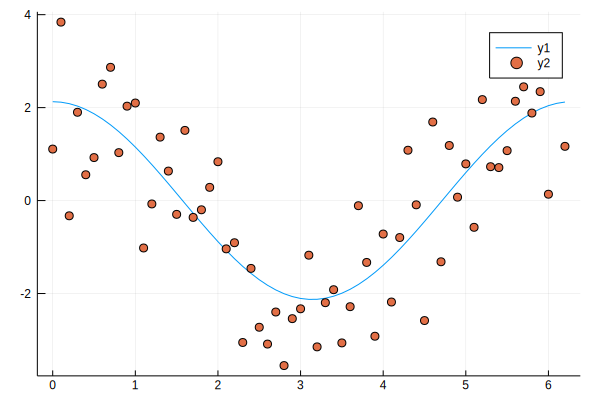

In [44]:
Y = Ajuste.param

plot(x,Modelo(x,Y))
scatter!(x,y_aleatorios)

[22] Revisa la complejidad del algoritmo que Julia usa para invertir matrices de $n\times n$.

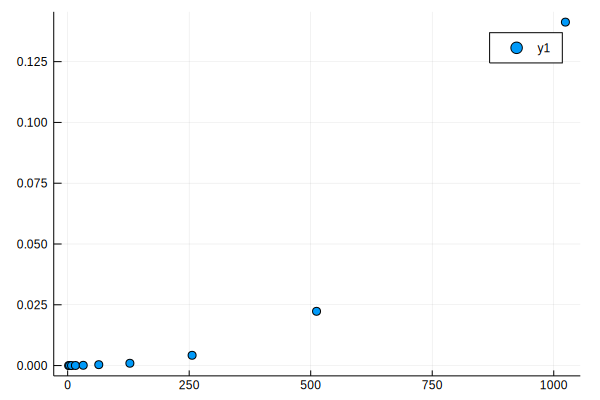

In [199]:
Tiempos = []
exponente = 10
for i in 1:exponente
    n = 2^(i)
    a = rand(n,n)
    t = @belapsed inv(a)
    push!(Tiempos,t)
end

scatter(2 .^(1:exponente), Tiempos)

In [177]:
?@btime

```
@btime expression [other parameters...]
```

Similar to the `@time` macro included with Julia, this executes an expression, printing the time it took to execute and the memory allocated before returning the value of the expression.

Unlike `@time`, it uses the `@benchmark` macro, and accepts all of the same additional parameters as `@benchmark`.  The printed time is the *minimum* elapsed time measured during the benchmark.


[23]  Haz, por medio de fuerza bruta, una función para encontrar el par de puntos más cercanos entre un conjunto de n puntos. Obtén la complejidad (numericamente) de tu función.

In [244]:
function puntos_aleatorios(n)
    Ptos = []
    while length(Ptos) < n
        B1 = 100*rand(2)
        push!(Ptos, B1)
    end
    return Ptos
end

puntos_aleatorios (generic function with 2 methods)

In [247]:
function Puntos_mas_cerca(Conjunto)
    arreglo = [Conjunto[1]-Conjunto[2]]
    Puntos = []
    for i in 1:length(Conjunto)
        for j in 1:length(Conjunto)
            if j > i
                a = Conjunto[i] - Conjunto[j]
                if norm(a) <= norm(arreglo) && norm(a) != 0
                    arreglo = a
                    Puntos = [i,j]
                end
            end
        end
    end
#return Conjunto[Puntos[1]],  Conjunto[Puntos[2]]
println("Puntos más cercanos entre sí: ", Conjunto[Puntos[1]], " y ", Conjunto[Puntos[2]])
print("Distan una distancia entre sí de: ", norm(arreglo))
end
Puntos_mas_cerca(puntos_aleatorios(3))

Puntos más cercanos entre sí: [99.1668, 88.1346] y [86.1206, 96.5422]
Distan una distancia entre sí de: 15.520658909680588

In [249]:
Tiempos = []
#n = 3:10
for i in [3,4,5,6,7,8,9,10]
    t = @btime Puntos_mas_cerca(puntos_aleatorios(i))
    push!(Tiempos,t)
end

#scatter(n, Tiempos)

MethodError: MethodError: no method matching isless(::Int64, ::UnitRange{Int64})
Closest candidates are:
  isless(!Matched::Missing, ::Any) at missing.jl:66
  isless(::Real, !Matched::AbstractFloat) at operators.jl:149
  isless(::Integer, !Matched::ForwardDiff.Dual{Ty,V,N} where N where V) where Ty at /home/oscar/.julia/packages/ForwardDiff/N0wMF/src/dual.jl:140
  ...

In [52]:
length(A1)

10

[24] Compara las complejidades de agregar n números aleatorios en una lista vacía y encontrar su máximo, su mínimo, o verificar si algún número en particular se encuentra en la lista, y agregar n números aleatorios a un árbol binario y encontrar su máximo su mínimo, o verificar si algún número en particular se encuentra en el árbol.  

[25] Compara las complejidades de generar una lista ordenada de números a partir de una desordenada y apartir de un árbol.  